# This is how the Machine will figure out if number written is 9!

In [16]:
#@title Importing required libraries

import tensorflow as tf

In [17]:
#@title Loading MNIST dataset

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [18]:
#@title Normalizing data

x_train  = x_train / 255.0
x_test = x_test / 255.0

In [19]:
#@title This will be our model

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(128, activation=tf.nn.relu), 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [20]:
#@title Compiling the model

model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [21]:
#@title Making a callback function that will stop the training on 99% accuracy.

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('acc')>0.99): -> For older version !!
        if(logs.get('accuracy')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True

callback = myCallback()

In [22]:
#@title Let's start training!!

history = model.fit(
            x_train, y_train, epochs=10, callbacks=[callback]
)
print(history.epoch, history.history['accuracy'][-1])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2654 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0815 - accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0466 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 7/10
1848/1875 [============================>.] - ETA: 0s - loss: 0.0284 - accuracy: 0.9914
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9913
[0, 1, 2, 3, 4, 5, 6] 0.9912833571434021


In [78]:
from PIL import Image, ImageOps
import numpy as np

In [61]:
from google.colab import files
files.upload()

Saving 1.png to 1.png


{'1.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xa6\x00\x00\x01/\x08\x03\x00\x00\x00\xf8\x9eJ\xe1\x00\x00\x00\x84PLTE\xff\xff\xff\x00\x00\x00\xb0\xb0\xb0\xf2\xf2\xf2\xfa\xfa\xfa444\xf8\xf8\xf8>>>\xe9\xe9\xe9\xee\xee\xee\xd5\xd5\xd5\xe5\xe5\xe5...qqq\xcf\xcf\xcf\xca\xca\xca\xbe\xbe\xbe\xdf\xdf\xdf\x9a\x9a\x9a"""aaa)))\xb9\xb9\xb9\\\\\\jjj\x98\x98\x98\x7f\x7f\x7f\x17\x17\x17\x8c\x8c\x8c\xa7\xa7\xa7\x85\x85\x85\xb1\xb1\xb1\r\r\rIIIJJJ\x99\x99\x99RRRnnn]]]888AAAwww\x1d\x1d\x1d\x12\x12\x12\x99\x02\xba\xa5\x00\x00\x08\xf6IDATx\x9c\xd5]\xd7v\xe20\x10E\xa1\x93\xd0M\t\xc1\x94lH\x02\xf9\xff\xff[l\x9a\x01\xd9wdK\x9a\xf1}\xda\x07\x9c\xbd\xc7\x96\xa6\x97J\x85\x13\xad\x7f\xf3\xafYw\xd4a%\x011U\x17\xbcsSI\xc7p\xaf\x12x\xe1\xa6\x93\x82\x81\xba\xc7[\x8f\x9b\x91\x0e\r\xf5\x84\xaf!7\xa9g\x04\xcf4\x95\xdaU\xb9i=\xa0\xa3cyD\x9f\x9b\xd8=\xbeRh\xaa\x017\xb3$\xd2^\xe6\x11\x92\x0e\xe8.\x9d\xa6\xe2\xe6vC-\x83\xa5Zr\xb3\xbb\xe2Qf\xde\xa3\xc1M\xef\x82\xf7L\x9ab\x14\x92Vh^\xd1\xe5\xa6w\xc6k&K\xf5\xc1\x

In [80]:
image = Image.open("1.png").convert("L").resize((28,28))
image = ImageOps.invert(image)
image = np.array(image, dtype="float32")
image = np.expand_dims(image, 0)
image.shape
model.output
# image = [np.array(Image.open(BytesIO(im1[i])).convert("L").resize((img_width,img_height))) for i in im1]

<tf.Tensor 'dense_3/Softmax_1:0' shape=(None, 10) dtype=float32>

In [82]:
model.predict(image)
# model.predict(np.expand_dims(x_train[0], 0))
# model.summary()

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

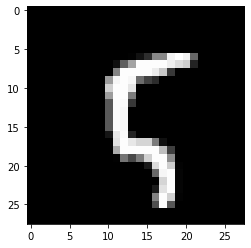

In [100]:
from matplotlib import pyplot as plt
plt.imshow(x_train[100], interpolation='nearest', cmap="gray")
plt.show()

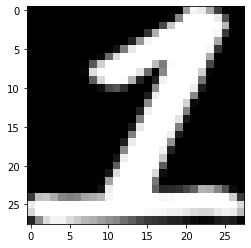

In [81]:
plt.imshow(image[0], interpolation='nearest', cmap="gray")
plt.show()

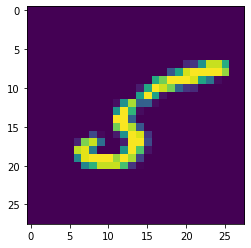

In [15]:

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

from matplotlib import pyplot as plt
plt.imshow(x_train[11], interpolation='nearest')
plt.show()


In [83]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tf.enable_v2_behavior()

In [84]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [86]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [112]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [113]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [114]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#   tf.keras.layers.Dense(128,activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation="relu",input_shape=(28, 28, 1)),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10, activation="softmax"),
])

In [115]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [116]:
model.fit(
    ds_train,
    epochs=9,
    validation_data=ds_test,
)

Epoch 1/9


ValueError: ignored

In [101]:
image = Image.open("92.png").convert("L").resize((28,28))
image = ImageOps.invert(image)
image = np.array(image, dtype="float32")
image = np.expand_dims(image, 0)
image.shape

(1, 28, 28)

In [102]:
model.predict(image)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)